In [65]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:

pre_name = "box_plot_v2"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados" / "analitycs" / "by_train" / "_pre_plot" / 'refined'
save_path = path_project / "6_resultados" / "analitycs" / "by_train" / "graphics"


In [67]:
# Carregar dados
files = [f for f in os.listdir(results_path) if f.endswith(".csv")]

all_data = []
for file in files:
    df = pd.read_csv(results_path / file)
    all_data.append(df)

df = pd.concat(all_data, axis=0, ignore_index=True)

# all columns
# Verificar os nomes presentes na coluna 'network'
NEURAL_NETWORKS = df['network'].unique()
df['dataset'] = df['dataset'].apply(
    lambda x: int(x) if isinstance(x, int) else int(float(x.split('_')[-1]))
)

print(NEURAL_NETWORKS)

print(df.head())

['GradientBoostingf' 'RandomForest' 'RandomForestf' 'MobileNetV2'
 'GradientBoosting' 'NBayes' 'ResNet50' 'InceptionV3' 'KNNf' 'KNN'
 'NBayesf' 'DenseNet201']
   dataset            network  partition  accuracy  precision  sensitivity  \
0       45  GradientBoostingf        1.0  0.932671   0.952163     0.911141   
1       45  GradientBoostingf        2.0  0.931493   0.948234     0.912795   
2       45  GradientBoostingf        3.0  0.924605   0.945602     0.901043   
3       45  GradientBoostingf        4.0  0.923426   0.945467     0.898687   
4       45  GradientBoostingf        5.0  0.914170   0.935575     0.889599   

   specificity  f1_score       npv       mcc  ...  val_TP  val_TN  val_FP  \
0     1.000000  0.931201  0.861111  0.847108  ...    25.0    31.0     0.0   
1     0.900000  0.930177  0.870968  0.770968  ...    27.0    27.0     3.0   
2     0.866667  0.922785  0.962963  0.837532  ...    29.0    26.0     4.0   
3     0.900000  0.921484  0.870968  0.767093  ...    26.0    27.

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def boxplot(main_pd, attribute, subset_value):
    plt.figure(figsize=(14, 8))
    print(main_pd['dataset'].unique())
    # Filtrar os dados para o subset especificado
    subset_pd = main_pd[main_pd['dataset'] == subset_value]

    if subset_pd.empty:
        print(f"Nenhum dado encontrado para o subset {subset_value}.")
        return

    # Mapa de cores para os modelos (agrupados por similaridade)
    color_map = {
        # CNNs (Azul)
        'InceptionV3': '#1f77b4',
        'MobileNetV2': '#1f77b4',
        'DenseNet201': '#1f77b4',
        'ResNet50': '#1f77b4',

        # Modelos de aprendizado supervisionado (Laranja)
        'KNN': '#ff7f0e',
        'NBayes': '#ff7f0e',
        'RandomForest': '#ff7f0e',
        'GradientBoosting': '#ff7f0e',

        # Fine-tuned models (Verde)
        'KNNf': '#2ca02c',
        'NBayesf': '#2ca02c',
        'RandomForestf': '#2ca02c',
        'GradientBoostingf': '#2ca02c'
    }

    # Lista de redes (modelos) a serem plotados
    NEURAL_NETWORKS = subset_pd['network'].unique()

    # Aplicar cores com base no mapa, usando cor cinza para modelos não especificados
    palette = [color_map.get(network, '#808080') for network in NEURAL_NETWORKS]
    print(NEURAL_NETWORKS)

    # Criar o boxplot horizontal
    sns.boxplot(
        x=attribute,
        y='network',
        hue='network',
        data=subset_pd,
        palette=palette,
        width=0.7,
        linewidth=1.2,
        fliersize=5,
        orient='h',
        whis=np.inf,
        order=NEURAL_NETWORKS,
        showmeans=True,
        meanprops={
            "marker": "x",
            "markerfacecolor": "white",
            "markeredgecolor": "red",
            "markersize": "9"
        },
        notch=True,
        showcaps=True,
        showfliers=True
    )

    plt.xlabel(f'{attribute.capitalize()} (%)', fontsize=14)
    plt.ylabel('Modelos', fontsize=14)

    # Ajuste dos ticks do eixo X
    plt.xticks(np.arange(0, 1.1, 0.1), [f"{int(i * 100)}%" for i in np.arange(0, 1.1, 0.1)], fontsize=16)
    plt.yticks(fontsize=14)

    # Anotar valores médios à direita
    mean_values = subset_pd.groupby('network')[attribute].mean()
    for i, network in enumerate(NEURAL_NETWORKS):
        if network in mean_values:
            mean_val = mean_values[network]
            percent = mean_val * 100
            plt.text(1.06, i, f'{percent:.2f}%', color='darkred', va='center', fontdict={'size': 16, 'weight': 'bold'})

    # Texto no canto superior direito "Média (x)"
    plt.text(1.03, -0.7, "Média (x)", color='darkred', va='center', fontdict={'size': 16, 'style': 'italic'})

    # Grade para melhor visualização
    plt.grid(axis='x', linestyle='--')
    plt.grid(axis='y', linestyle='--')

    # Título com estilo ajustado
    title = attribute.split('_')[1].capitalize() if '_' in attribute else attribute.capitalize()
    plt.title(
        f'{title} {subset_value:.2f}%',
        fontsize=18,
        fontweight='bold',
        pad=14,
        color='black',
        loc='center',
        backgroundcolor='lightgray',
        bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.6')
    )

    # Salvar figura
    plt.savefig(f"{attribute}_{subset_value}.svg", dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()


[ 45  40  70 100  35  80  25  50  20  85  10  30  65   5  75  55  60  15
  95  90]
['RandomForest' 'NBayesf' 'InceptionV3' 'GradientBoosting' 'RandomForestf'
 'ResNet50' 'MobileNetV2' 'KNNf' 'NBayes' 'KNN' 'DenseNet201'
 'GradientBoostingf']


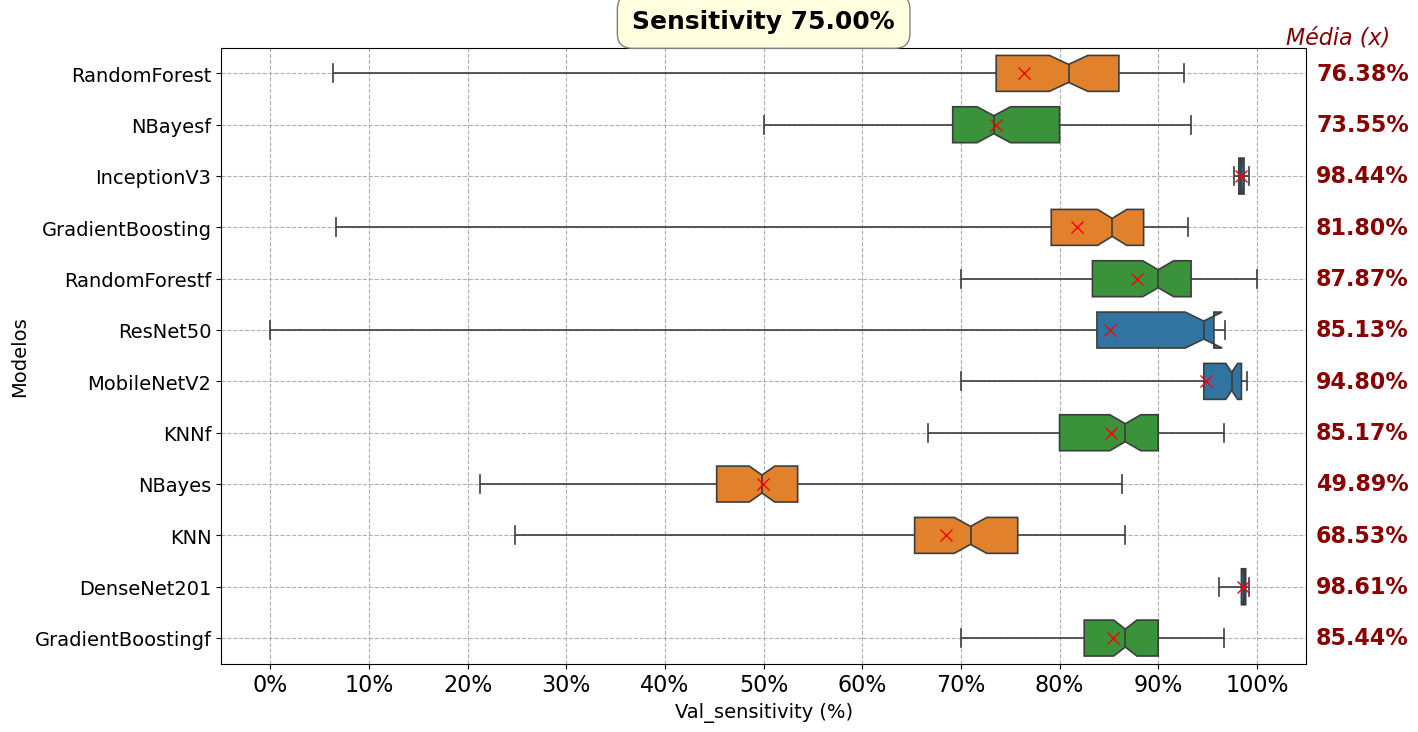

[ 45  40  70 100  35  80  25  50  20  85  10  30  65   5  75  55  60  15
  95  90]
['RandomForest' 'NBayesf' 'InceptionV3' 'GradientBoosting' 'RandomForestf'
 'ResNet50' 'MobileNetV2' 'KNNf' 'NBayes' 'KNN' 'DenseNet201'
 'GradientBoostingf']


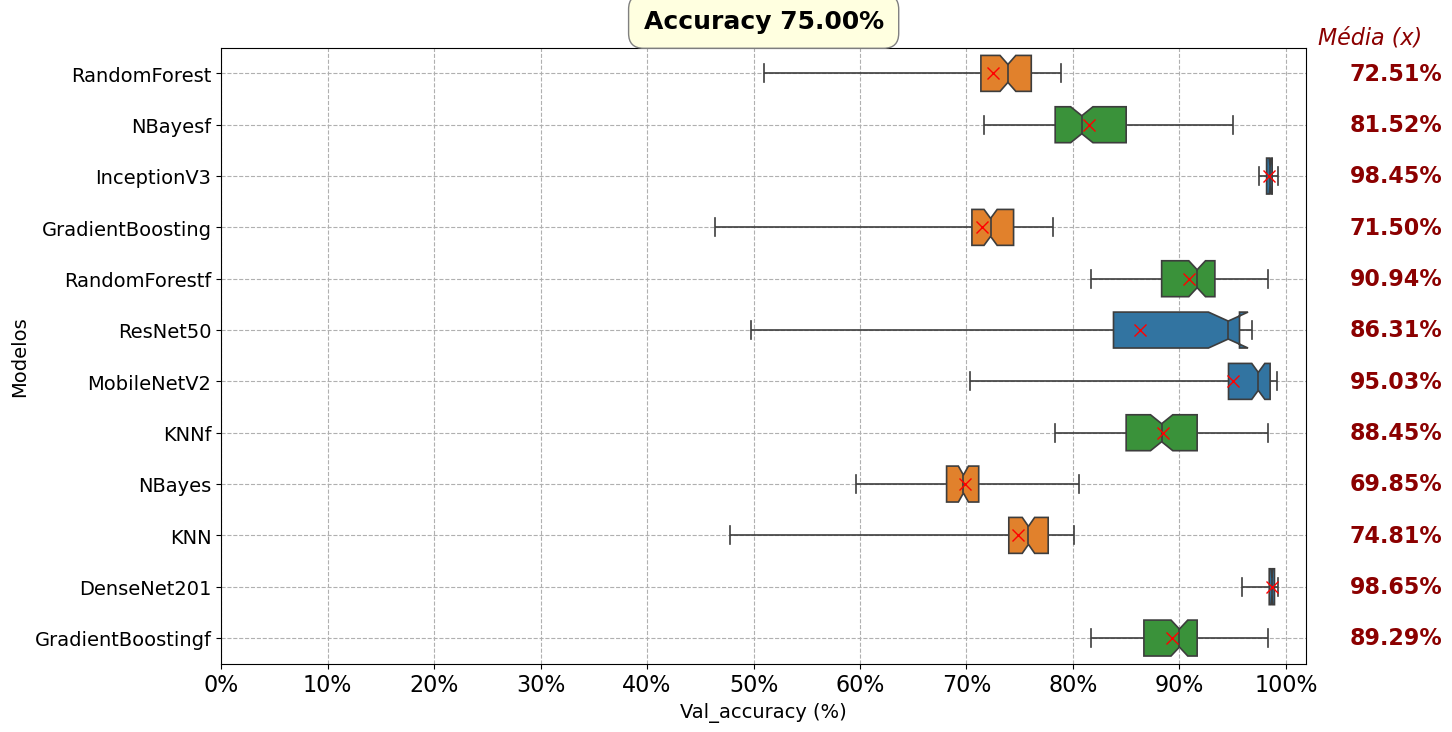

[ 45  40  70 100  35  80  25  50  20  85  10  30  65   5  75  55  60  15
  95  90]
['RandomForest' 'NBayesf' 'InceptionV3' 'GradientBoosting' 'RandomForestf'
 'ResNet50' 'MobileNetV2' 'KNNf' 'NBayes' 'KNN' 'DenseNet201'
 'GradientBoostingf']


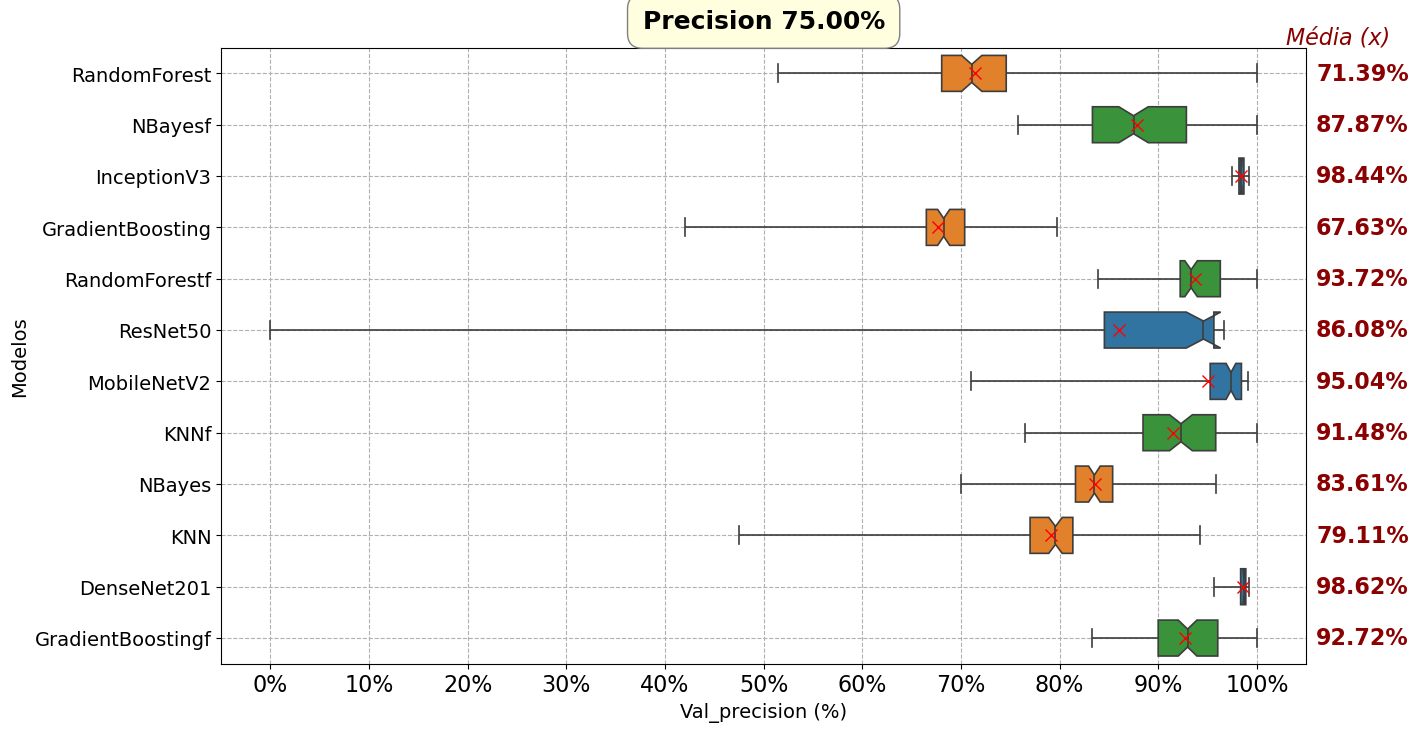

[ 45  40  70 100  35  80  25  50  20  85  10  30  65   5  75  55  60  15
  95  90]
['RandomForest' 'NBayesf' 'InceptionV3' 'GradientBoosting' 'RandomForestf'
 'ResNet50' 'MobileNetV2' 'KNNf' 'NBayes' 'KNN' 'DenseNet201'
 'GradientBoostingf']


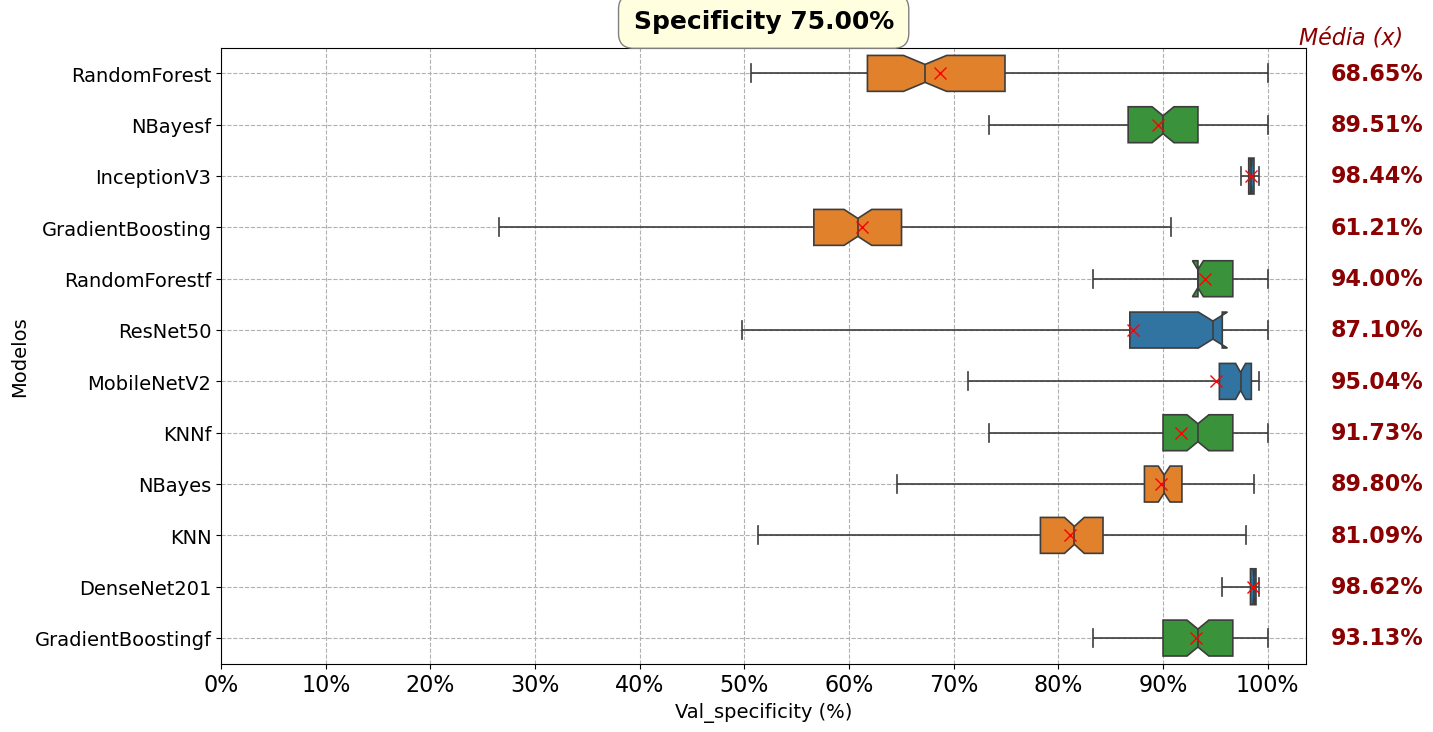

[ 45  40  70 100  35  80  25  50  20  85  10  30  65   5  75  55  60  15
  95  90]
['RandomForest' 'NBayesf' 'InceptionV3' 'GradientBoosting' 'RandomForestf'
 'ResNet50' 'MobileNetV2' 'KNNf' 'NBayes' 'KNN' 'DenseNet201'
 'GradientBoostingf']


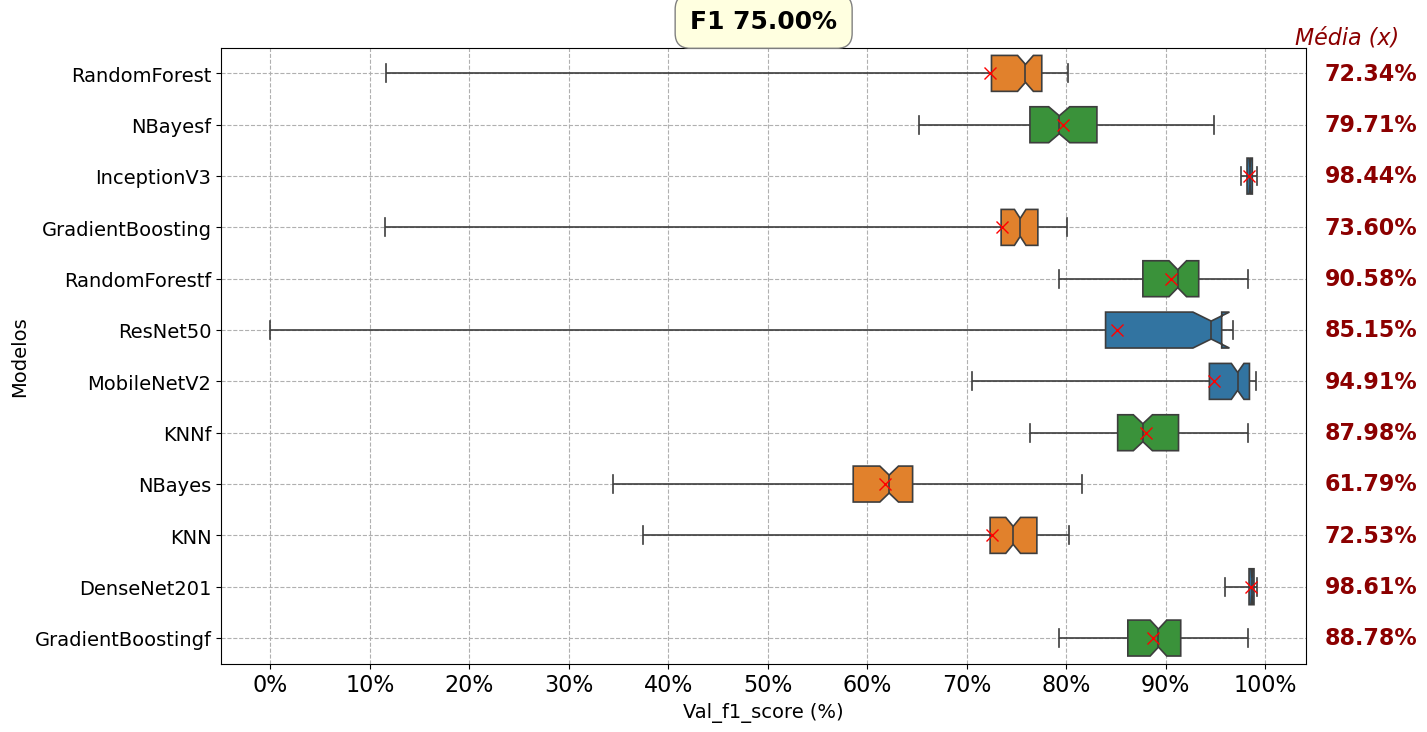

[ 45  40  70 100  35  80  25  50  20  85  10  30  65   5  75  55  60  15
  95  90]
['RandomForest' 'NBayesf' 'InceptionV3' 'GradientBoosting' 'RandomForestf'
 'ResNet50' 'MobileNetV2' 'KNNf' 'NBayes' 'KNN' 'DenseNet201'
 'GradientBoostingf']


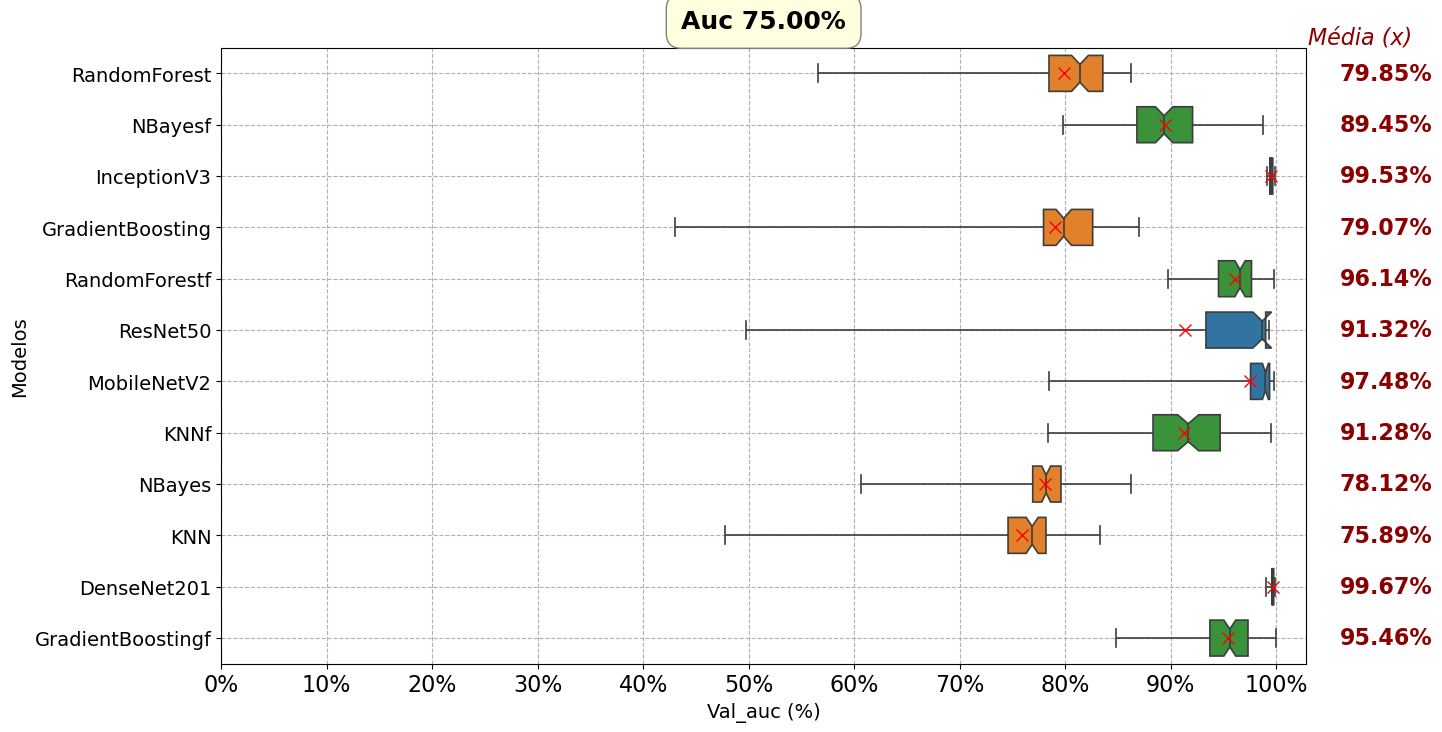

In [69]:
# Colunas a serem plotadas
COLUMNS = ["val_sensitivity", "val_accuracy", "val_precision", "val_specificity", 
           "val_f1_score", "val_auc"]

# Gerar gráficos
for column in COLUMNS:
    boxplot(df, column, 75)